# **Project for the course: Computational Mathematics**
## **Group 1: Fois Giulia, Manini Nicolas**

**Analysis for the benchmark dataset - evaluation of the error difference from the optimal approximation by category of image**

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_dir = "frames_test_results";
frame_type_dfs = {}

for frames_file in os.listdir(base_dir):
  frames_res_path = base_dir + "/" + frames_file;
  frames_category = frames_file.split("_")[len(frames_file.split("_")) - 1].replace(".csv", "");
  frame_type_dfs[frames_category] = pd.read_csv(frames_res_path);


Remove the outliers

In [2]:
def remove_outliers(df_col):
  f_quart = df_col.quantile(0.25)
  t_quart = df_col.quantile(0.75)
  iqr = t_quart - f_quart
  return [el for el in df_col if (el > f_quart - 1.5 * iqr) and (el < t_quart + 1.5 * iqr)]; 
  
diff_errs = [frame_type_dfs[df]["diff"] for df in frame_type_dfs];
diff_errs_no_outliers = [remove_outliers(frame_type_dfs[df]["diff"]) for df in frame_type_dfs];

**Box plots**

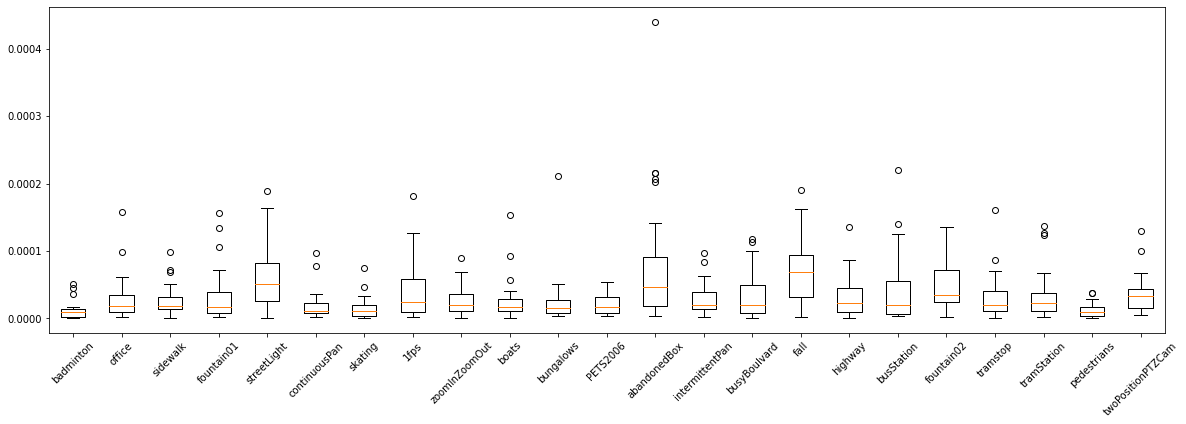

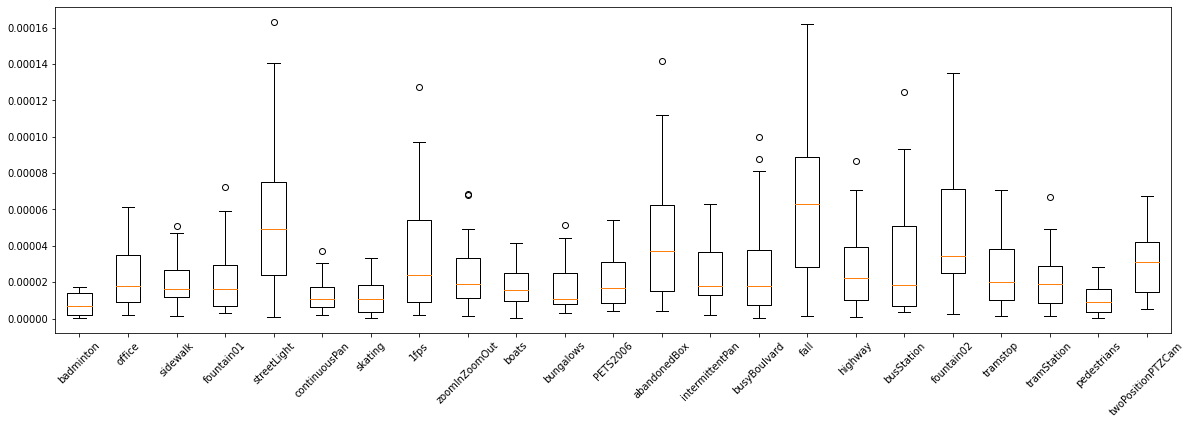

In [3]:
plt.figure(figsize=(20,6))
r = range(1, len(diff_errs)+1)
plt.xticks(rotation=45);
plt.boxplot(diff_errs,positions=[i for i in r],labels=[l for l in frame_type_dfs]);

plt.figure(figsize=(20,6))
r = range(1, len(diff_errs_no_outliers)+1)
plt.xticks(rotation=45);
plt.boxplot(diff_errs_no_outliers,positions=[i for i in r],labels=[l for l in frame_type_dfs]);